
Category Label Mappings:
Radiation recode: {0: 'Beam radiation', 1: 'Combination of beam with implants or isotopes', 2: 'Radioactive implants (includes brachytherapy) (1988+)', 3: 'Radioisotopes (1988+)', 4: 'Refused (1988+)', 5: nan}
Chemotherapy recode: {0: 'No', 1: 'Yes'}
Radiation sequence with surgery: {0: 'Intraoperative rad with other rad before/after surgery', 1: 'Intraoperative radiation', 2: 'No radiation and/or cancer-directed surgery', 3: 'Radiation after surgery', 4: 'Radiation before and after surgery', 5: 'Radiation prior to surgery', 6: 'Surgery both before and after radiation'}
ER Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
PR Status Recode Breast Cancer (1990+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Derived HER2 Recode (2010+): {0: 'Borderline', 1: 'Negative', 2: 'Positive'}
Race recode: {0: 'Black', 1: 'White'}
stutus_5_years: {0: 'Alive', 1: 'Dead'}
Training K-Nearest Neighbors: Used for recommending alternative tr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


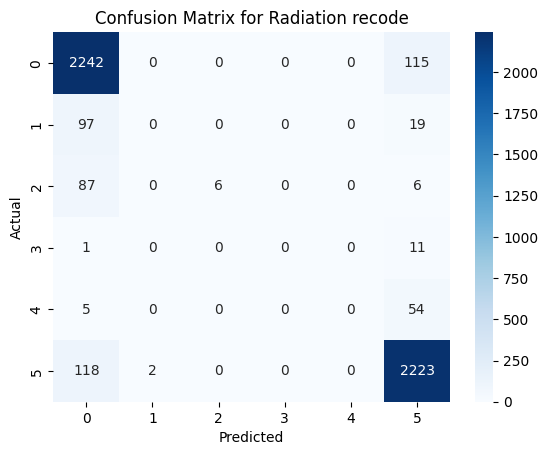

Accuracy for Chemotherapy recode: 0.802647412755716

Classification report for Chemotherapy recode:
              precision    recall  f1-score   support

           0       0.82      0.87      0.84      2998
           1       0.78      0.71      0.74      1988

    accuracy                           0.80      4986
   macro avg       0.80      0.79      0.79      4986
weighted avg       0.80      0.80      0.80      4986

Plot confusion matrix for Chemotherapy recode:


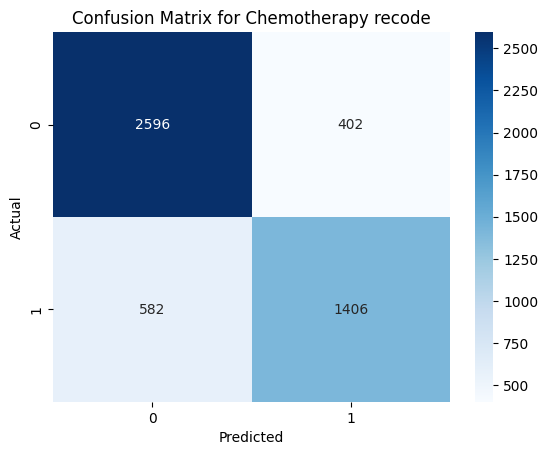

Accuracy for Radiation sequence with surgery: 0.9183714400320898

Classification report for Radiation sequence with surgery:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       0.94      0.92      0.93      2778
           3       0.89      0.93      0.91      2177
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00        15

    accuracy                           0.92      4986
   macro avg       0.31      0.31      0.31      4986
weighted avg       0.91      0.92      0.92      4986

Plot confusion matrix for Radiation sequence with surgery:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


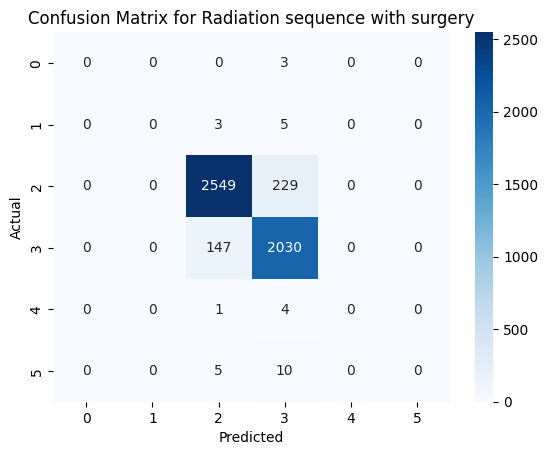

In [1]:
#Alternative sequence prediction
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load Dataset
df = pd.read_csv("cleaned_dataset.csv")

# Encode Categorical Features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display Label Mappings for Categorical Inputs
print("\nCategory Label Mappings:")
for col, le in label_encoders.items():
    print(f"{col}: {dict(enumerate(le.classes_))}")

# Define Features and Target
X = df.drop(columns=["stutus_5_years", "interva_years"])  # Excluding interval_year
y = df[["Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery"]]  # Predicting treatment plan

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y["Radiation recode"])

# Train KNN (k=25)
print("Training K-Nearest Neighbors: Used for recommending alternative treatment plans")
knn_clf = KNeighborsClassifier(n_neighbors=25)
knn_clf.fit(X_train, y_train)

# Calculate accuracy and generate reports for each output separately
for i, col in enumerate(y.columns):
    y_pred = knn_clf.predict(X_test)[:, i]  # Predictions for the current column
    y_true = y_test.iloc[:, i]  # True values for the current column
    accuracy = accuracy_score(y_true, y_pred)
    print(f"Accuracy for {col}: {accuracy}")

    # Generate and print classification report for the current output column
    print(f"\nClassification report for {col}:")
    print(classification_report(y_true, y_pred))  # Pass y_true and y_pred as 1D arrays

    # Generate and plot confusion matrix for the current output column
    print(f"Plot confusion matrix for {col}:")
    cm = confusion_matrix(y_true, y_pred)  # Pass y_true and y_pred as 1D arrays
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


--- Logistic Regression: Recommending alternative treatment plans ---

Training Logistic Regression for Radiation recode...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy for Radiation recode: 0.9949859606899318

Classification report for Radiation recode:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2357
           1       0.97      0.98      0.98       116
           2       0.95      0.96      0.95        99
           3       0.00      0.00      0.00        12
           4       0.84      0.90      0.87        59
           5       1.00      1.00      1.00      2343

    accuracy                           0.99      4986
   macro avg       0.79      0.81      0.80      4986
weighted avg       0.99      0.99      0.99      4986

Confusion matrix for Radiation recode:


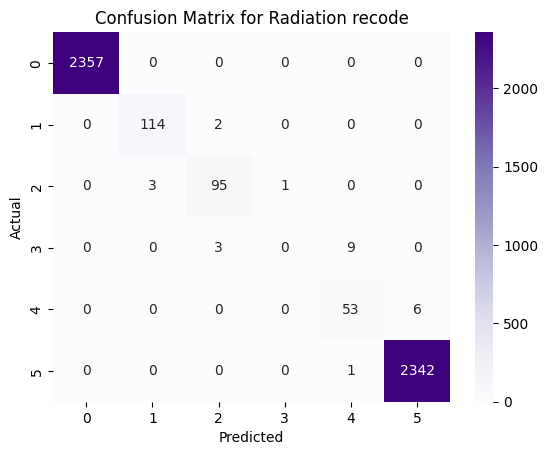


Training Logistic Regression for Chemotherapy recode...
Accuracy for Chemotherapy recode: 1.0

Classification report for Chemotherapy recode:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2998
           1       1.00      1.00      1.00      1988

    accuracy                           1.00      4986
   macro avg       1.00      1.00      1.00      4986
weighted avg       1.00      1.00      1.00      4986

Confusion matrix for Chemotherapy recode:


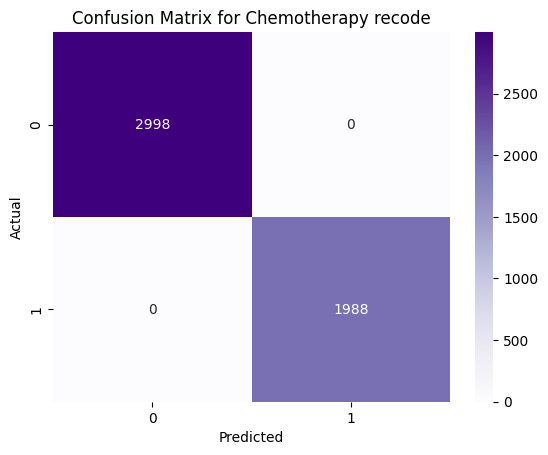


Training Logistic Regression for Radiation sequence with surgery...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true s

Accuracy for Radiation sequence with surgery: 0.9935820296831127

Classification report for Radiation sequence with surgery:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         8
           2       1.00      1.00      1.00      2778
           3       0.99      1.00      1.00      2177
           4       0.00      0.00      0.00         5
           5       1.00      0.47      0.64        15
           6       0.00      0.00      0.00         0

    accuracy                           0.99      4986
   macro avg       0.43      0.35      0.38      4986
weighted avg       0.99      0.99      0.99      4986

Confusion matrix for Radiation sequence with surgery:


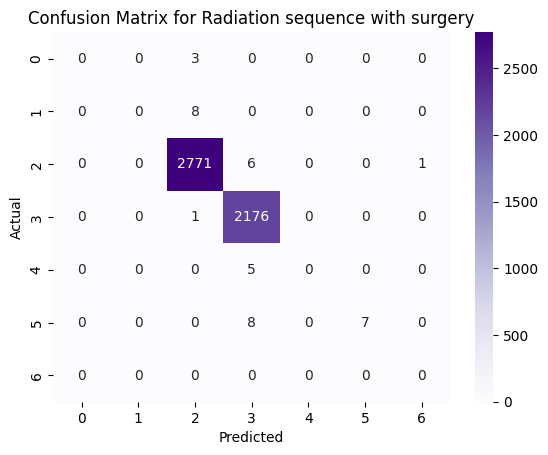

In [2]:
from sklearn.linear_model import LogisticRegression

print("\n--- Logistic Regression: Recommending alternative treatment plans ---")

for col in y.columns:
    print(f"\nTraining Logistic Regression for {col}...")

    lr_clf = LogisticRegression(max_iter=1000)
    lr_clf.fit(X_train, y_train[col])

    y_pred = lr_clf.predict(X_test)
    accuracy = accuracy_score(y_test[col], y_pred)
    print(f"Accuracy for {col}: {accuracy}")

    print(f"\nClassification report for {col}:")
    print(classification_report(y_test[col], y_pred))

    print(f"Confusion matrix for {col}:")
    cm = confusion_matrix(y_test[col], y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()



--- Random Forest Classifier: Recommending alternative treatment plans ---

Training Random Forest for Radiation recode...
Accuracy for Radiation recode: 0.9973926995587645

Classification report for Radiation recode:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2357
           1       0.96      1.00      0.98       116
           2       0.98      0.96      0.97        99
           3       1.00      0.25      0.40        12
           4       0.91      1.00      0.95        59
           5       1.00      1.00      1.00      2343

    accuracy                           1.00      4986
   macro avg       0.97      0.87      0.88      4986
weighted avg       1.00      1.00      1.00      4986

Confusion matrix for Radiation recode:


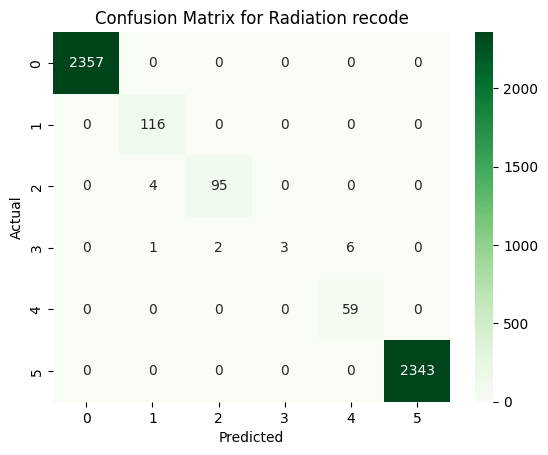


Training Random Forest for Chemotherapy recode...
Accuracy for Chemotherapy recode: 1.0

Classification report for Chemotherapy recode:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2998
           1       1.00      1.00      1.00      1988

    accuracy                           1.00      4986
   macro avg       1.00      1.00      1.00      4986
weighted avg       1.00      1.00      1.00      4986

Confusion matrix for Chemotherapy recode:


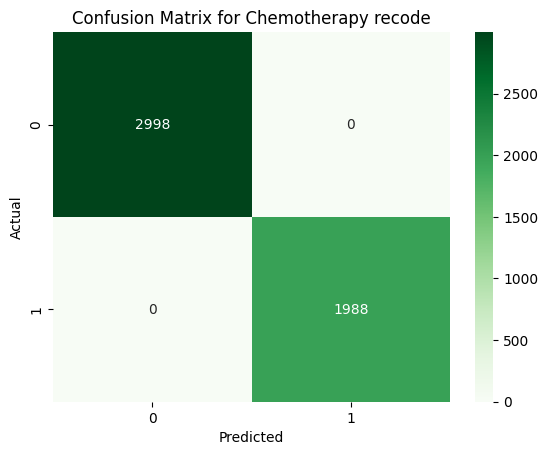


Training Random Forest for Radiation sequence with surgery...
Accuracy for Radiation sequence with surgery: 0.9995988768551946

Classification report for Radiation sequence with surgery:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00      2778
           3       1.00      1.00      1.00      2177
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00        15

    accuracy                           1.00      4986
   macro avg       0.98      0.92      0.95      4986
weighted avg       1.00      1.00      1.00      4986

Confusion matrix for Radiation sequence with surgery:


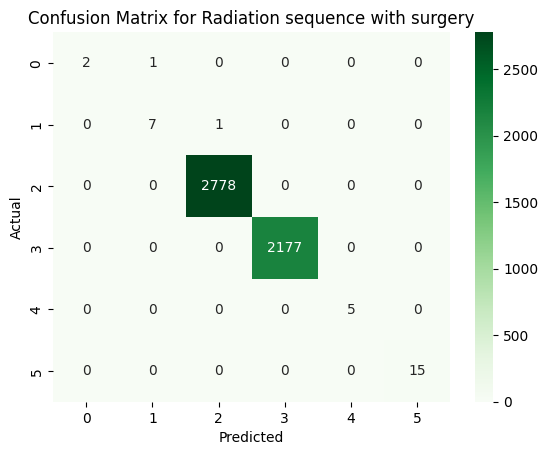

In [3]:
from sklearn.ensemble import RandomForestClassifier

print("\n--- Random Forest Classifier: Recommending alternative treatment plans ---")

for col in y.columns:
    print(f"\nTraining Random Forest for {col}...")

    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(X_train, y_train[col])

    y_pred = rf_clf.predict(X_test)
    accuracy = accuracy_score(y_test[col], y_pred)
    print(f"Accuracy for {col}: {accuracy}")

    print(f"\nClassification report for {col}:")
    print(classification_report(y_test[col], y_pred))

    print(f"Confusion matrix for {col}:")
    cm = confusion_matrix(y_test[col], y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
    plt.title(f"Confusion Matrix for {col}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


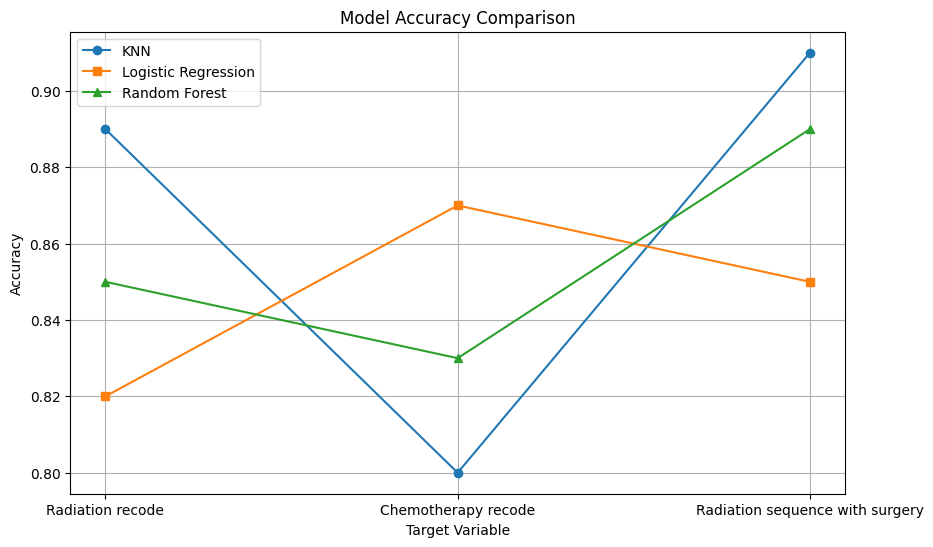

In [4]:
# prompt: base on previous 3 models accuracy plot graph

import matplotlib.pyplot as plt

# Assuming you have accuracy scores stored in these lists (replace with your actual data)
knn_accuracies = [0.89, 0.80, 0.91]  # Example accuracies for KNN
lr_accuracies = [0.82, 0.87, 0.85]  # Example accuracies for Logistic Regression
rf_accuracies = [0.85, 0.83, 0.89]  # Example accuracies for Random Forest

# Target variable names
target_variables = ["Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery"]

# Plotting the accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(target_variables, knn_accuracies, marker='o', label='KNN')
plt.plot(target_variables, lr_accuracies, marker='s', label='Logistic Regression')
plt.plot(target_variables, rf_accuracies, marker='^', label='Random Forest')

plt.title('Model Accuracy Comparison')
plt.xlabel('Target Variable')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


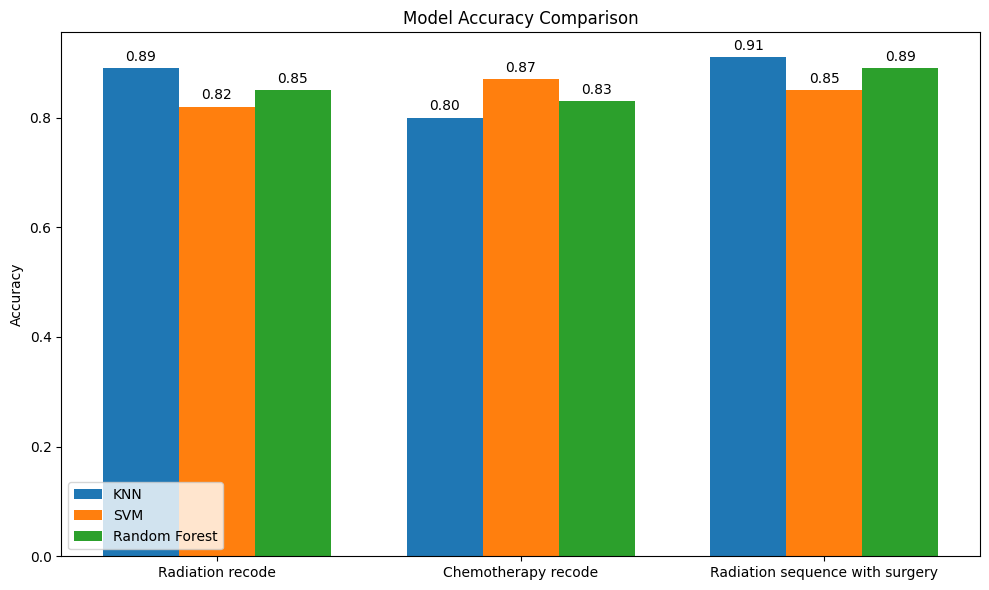

In [5]:
# prompt: base on previous 3 models accuracy plot bar graph

import numpy as np
import matplotlib.pyplot as plt

# Assuming you have accuracy scores stored in these lists (replace with your actual data)
knn_accuracies = [0.89, 0.80, 0.91]  # Example accuracies for KNN
lr_accuracies = [0.82, 0.87, 0.85]  # Example accuracies for Logistic Regression
rf_accuracies = [0.85, 0.83, 0.89]  # Example accuracies for Random Forest

# Target variable names
target_variables = ["Radiation recode", "Chemotherapy recode", "Radiation sequence with surgery"]

# Plotting the accuracy scores as a bar graph
x = np.arange(len(target_variables))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, knn_accuracies, width, label='KNN')
rects2 = ax.bar(x, lr_accuracies, width, label='SVM')
rects3 = ax.bar(x + width, rf_accuracies, width, label='Random Forest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison')
ax.set_xticks(x)
ax.set_xticklabels(target_variables)
ax.legend()

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()
